# Time Series Forecasting with ARIMA

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Company Stock and Investment.csv', parse_dates=['Date'])

In [3]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
df.tail()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
1979,2017-09-11,0.005984,0.000623,-0.002043,-0.003310
1980,2017-10-11,-0.007173,-0.000389,-0.006880,-0.003348
1981,2017-11-13,0.000352,-0.004944,-0.004008,0.003395
1982,2017-11-14,-0.019376,-0.002621,-0.015118,0.006793
1983,2017-11-15,-0.007006,0.005963,-0.013190,-0.008928


In [5]:
#Converting Date into Datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [6]:
df.dtypes

Date                       datetime64[ns]
Oil Investments                   float64
Gold Investments                  float64
Comp Stock                        float64
Other sharesInvestments           float64
dtype: object

In [7]:
# Creating the first model
df1 = df[['Date','Oil Investments']]

In [8]:
#Checking the top five rows
df1.head()

,Date,Oil Investments
0,2009-12-31,0.025417
1,2010-04-01,0.026830
2,2010-05-01,0.002699
3,2010-06-01,0.021688
4,2010-07-01,-0.006256


In [9]:
#Checking the last five rows
df1.tail()

,Date,Oil Investments
1979,2017-09-11,0.005984
1980,2017-10-11,-0.007173
1981,2017-11-13,0.000352
1982,2017-11-14,-0.019376
1983,2017-11-15,-0.007006


In [10]:
#Checking for null values
df1.isnull().values.any()

False

In [11]:
#checking the null values in columns
df1.isnull().sum()

Date               0
Oil Investments    0
dtype: int64

In [12]:
df1.set_index('Date',inplace=True)
df1.head()

,Oil Investments
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256


In [13]:
df1.isnull().sum()

Oil Investments    0
dtype: int64

In [14]:
df1.describe()

,Oil Investments
count,1984.000000
mean,-0.000435
std,0.030869
min,-1.000000
25%,-0.011021
50%,0.000277
75%,0.010734
max,0.119511


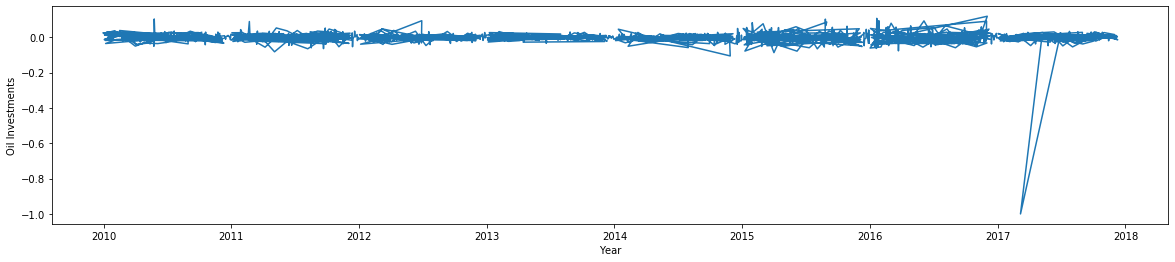

In [15]:
# plot gold investment over all years
plt.figure(figsize=(20,4))
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Oil Investments')
plt.plot(df1.index, df1['Oil Investments']);

Initial thoughts on data: there's a strong trend throughout the data, with extreme fluctuations. Will need to look closer at the data using a shorter time frame to see why oil investment as low as -1-0.1 on some days. I don't see any annual seasonal trends.

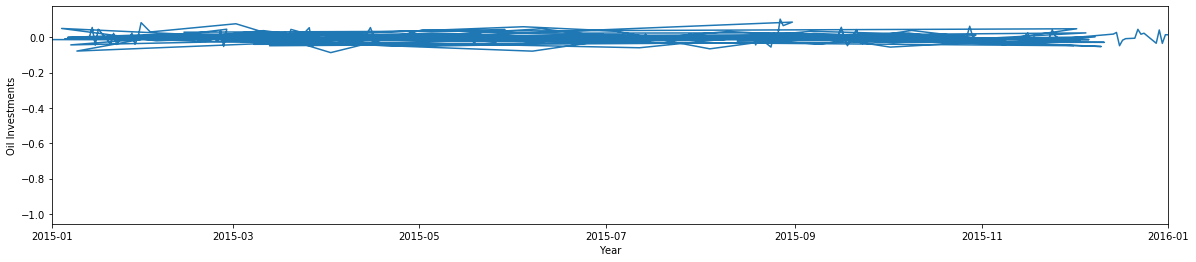

In [16]:
# Oil Investment  for 2015
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2016,1,1)

plt.figure(figsize=(20,4))
ax = plt.gca()
ax.set_xlim(start, end)
ax.set_xlabel('Year')
ax.set_ylabel('Oil Investments')
plt.plot(df1.index, df1['Oil Investments']);

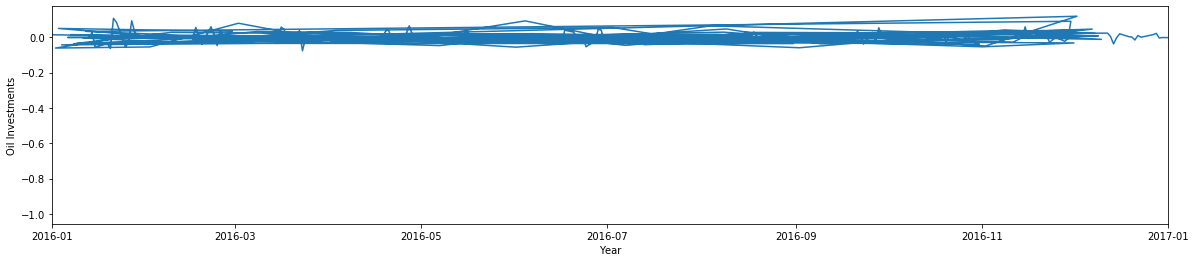

In [17]:
# Oil Investment  for 2016
start = datetime.datetime(2016,1,1)
end = datetime.datetime(2017,1,1)

plt.figure(figsize=(20,4))
ax = plt.gca()
ax.set_xlim(start, end)
ax.set_xlabel('Year')
ax.set_ylabel('Oil Investments')
plt.plot(df1.index, df1['Oil Investments'])

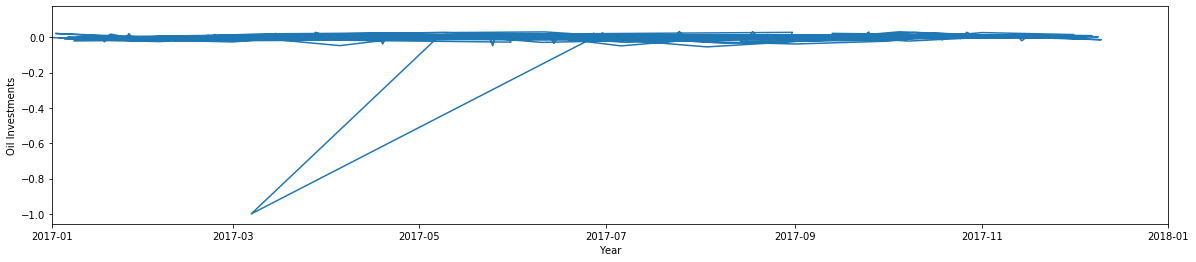

In [18]:
# Oil Investment  for 2017
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2018,1,1)

plt.figure(figsize=(20,4))
ax = plt.gca()
ax.set_xlim(start, end)
ax.set_xlabel('Year')
ax.set_ylabel('Oil Investments')
plt.plot(df1.index, df1['Oil Investments'])

In [19]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[0.83768566],
       [0.88345251],
       [0.10154433],
       ...,
       [0.02551751],
       [0.61375342],
       [0.21290234]])

In [20]:
threshold=3
print(np.where(z>3))

(array([ 100,  629, 1236, 1423, 1523, 1527, 1539, 1575, 1888], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [21]:
df1_new=df1[(z<3).all(axis=1)]

In [22]:
#Checking the shape
print(df1.shape,'\t\t',df1_new.shape)

(1984, 1) 		 (1975, 1)


In [23]:
df1 = df1_new
df1.shape

(1975, 1)

## Step 2: Visualize the Data

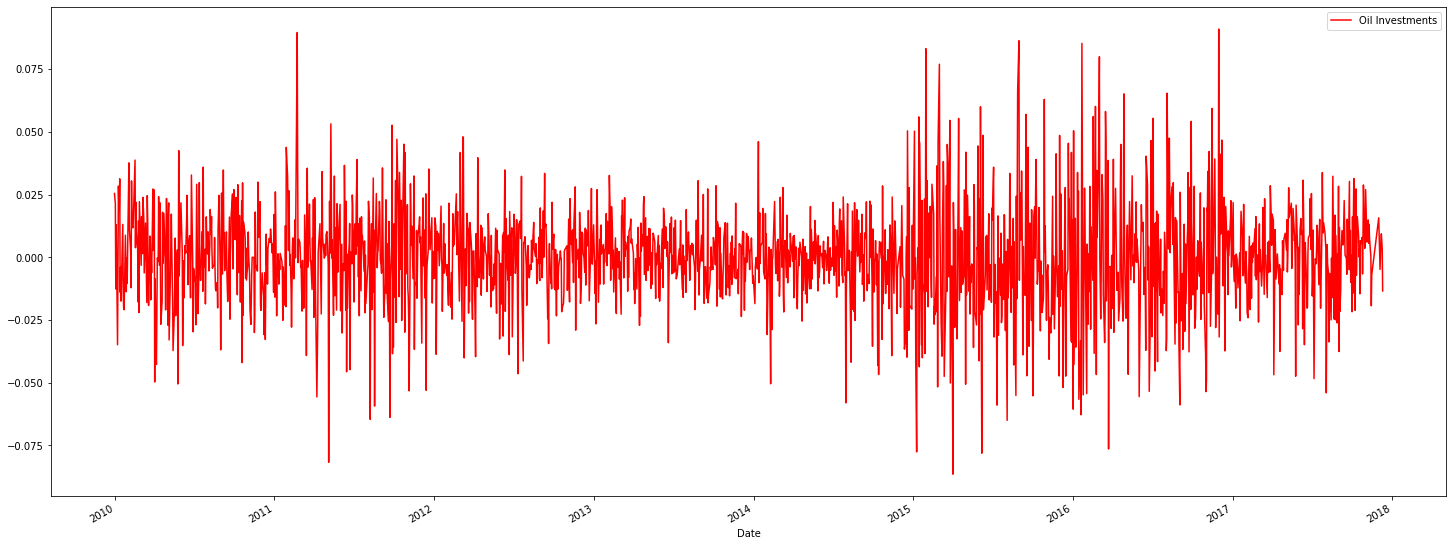

In [24]:
df1.plot(figsize=(25,10),color='r')

## In above plot data looks like seasonal data ,as every year stock Investments goes high and low in the particular year.

## Now we will check if data is stationary or not.

In [25]:
# Testing for Stationary
from statsmodels.tsa.stattools import adfuller

In [26]:
#adfuller gives us five results
test_result = adfuller(df1['Oil Investments'])

In [27]:
# Just showing the output of test_result
print("The Values given as output by adfuller is : \n 'ADF Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used' \n\n", test_result)

The Values given as output by adfuller is : 
 'ADF Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used' 

 (-46.29558276634846, 0.0, 0, 1974, {'1%': -3.43366703339965, '5%': -2.8630052761696607, '10%': -2.567550052177805}, -9674.64094494119)


## Most Important value is p-value above

In [28]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(oil_investments):
    result = adfuller(oil_investments)  #same as above variable name changed
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is Stationary")
    else:
        print("Weak evidence against null hypothesis, time series is non-stationary")

In [29]:
adfuller_test(df1['Oil Investments'])

ADF Test Statistic : -46.29558276634846
p-value : 0.0
Lags Used : 0
Number of Observations Used : 1974
Strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is Stationary


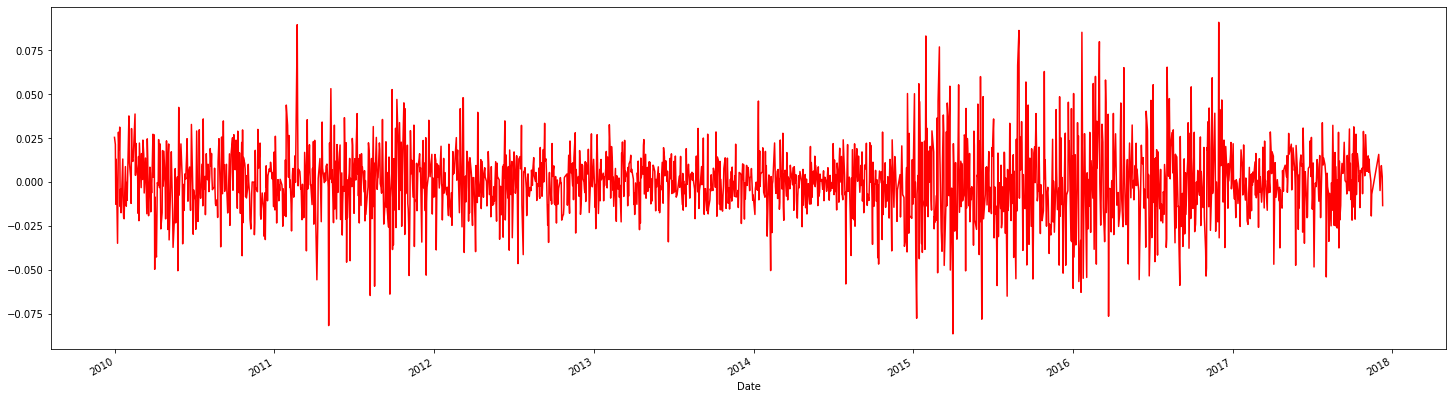

In [30]:
df1['Oil Investments'].plot(figsize=(25,7),color='r')

## Seasonal ARIMA

In [31]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax

In [32]:
model=sm.tsa.statespace.SARIMAX(df1['Oil Investments'].dropna(),order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Oil Investments   No. Observations:                 1975
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                4835.116
Date:                            Fri, 23 Oct 2020   AIC                          -9660.232
Time:                                    22:11:30   BIC                          -9632.323
Sample:                                         0   HQIC                         -9649.974
                                           - 1975                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0439      0.017     -2.653      0.008      -0.076      -0.011
ma.L1         -0.9971      0.003   -365.798      0.000      -1.002      -0.992
ar.S.L12      -0.0063      0.019     -0.335      0.738      -0.043       0.031
ma.S.L12      -0.9988      0.057    -17.440      0.000      -1.111      -0.887
sigma2         0.0004   2.38e-05     17.171      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       55.07   Jarque-Bera (JB):               318.16
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               1.63   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

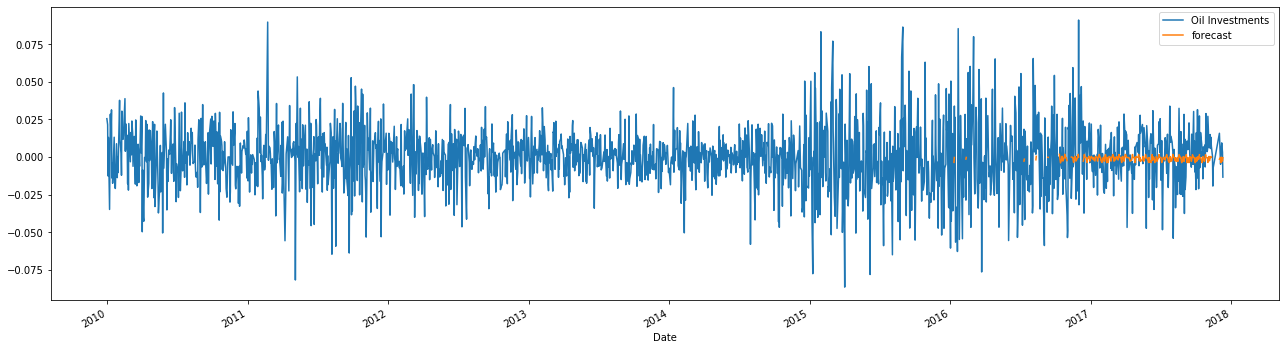

In [34]:
df1['forecast'] = results.predict(start=1700,end=1970,dynamic=True)
df1[['Oil Investments','forecast']].plot(figsize=(22,6))
plt.show()

## Now creating some data to predict future of this

In [35]:
from pandas.tseries.offsets import DateOffset
future_dates=[df1.index[-1] + DateOffset(months=x)for x in range(0,36)]

In [36]:
future_datest_df1=pd.DataFrame(index=future_dates[1:],columns=df1.columns)

In [37]:
future_datest_df1.tail()

,Oil Investments,forecast
2020-06-15,NaN,NaN
2020-07-15,NaN,NaN
2020-08-15,NaN,NaN
2020-09-15,NaN,NaN
2020-10-15,NaN,NaN


In [38]:
future_df1=pd.concat([df1,future_datest_df1])

In [39]:
future_df1.index

DatetimeIndex(['2009-12-31', '2010-04-01', '2010-05-01', '2010-06-01',
               '2010-07-01', '2010-08-01', '2010-11-01', '2010-12-01',
               '2010-01-13', '2010-01-14',
               ...
               '2020-01-15', '2020-02-15', '2020-03-15', '2020-04-15',
               '2020-05-15', '2020-06-15', '2020-07-15', '2020-08-15',
               '2020-09-15', '2020-10-15'],
              dtype='datetime64[ns]', length=2010, freq=None)

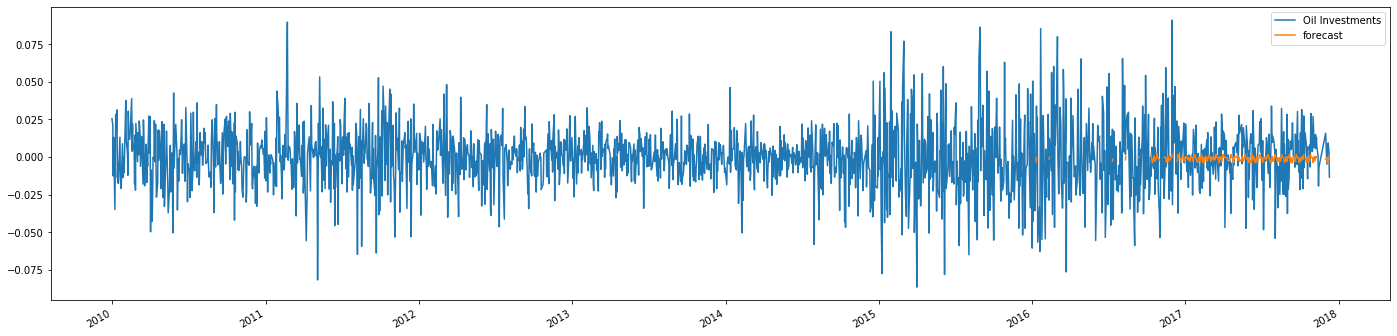

In [40]:
future_df1['forecast'] = results.predict(start = 1700, end = 1970, dynamic= True)  
future_df1[['Oil Investments', 'forecast']].plot(figsize=(24,6))
plt.show()